In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 1: Load the Data**

In [4]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Display the first few rows of each dataset
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [6]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [7]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


# **Step 2: Data Cleaning**

In [11]:
# Check for missing values
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [12]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [13]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [14]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# **Step 3: Exploratory Data Analysis (EDA)**

## **1. Customer Analysis**

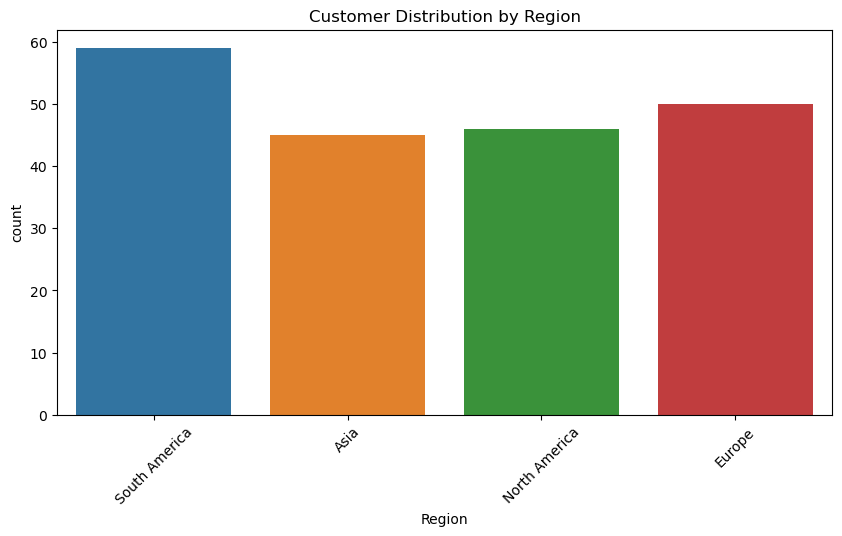

In [15]:
# Distribution of customers by region
plt.figure(figsize=(10, 5))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

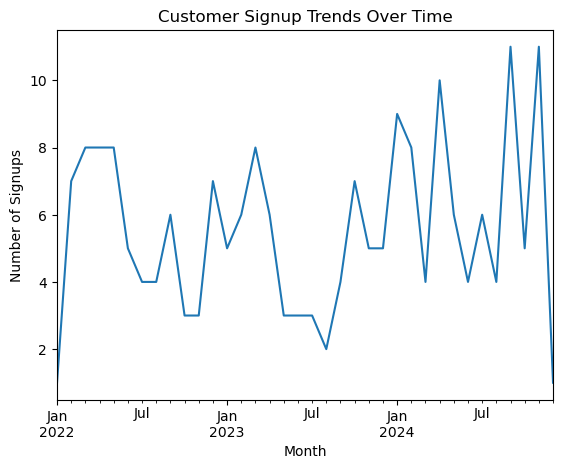

In [16]:
# Signup trends over time
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
signup_trends.plot(kind='line', title='Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

## **2. Product Analysis**

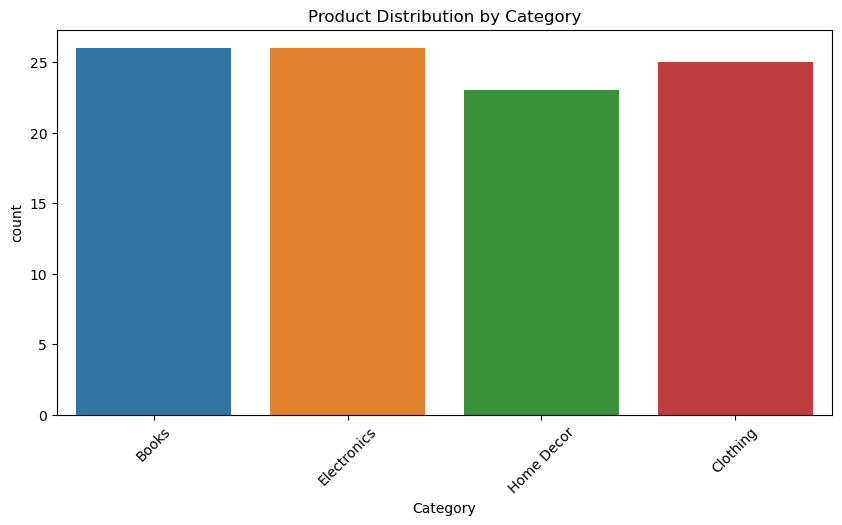

In [17]:
# Distribution of products by category
plt.figure(figsize=(10, 5))
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\Sanjay Kinage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


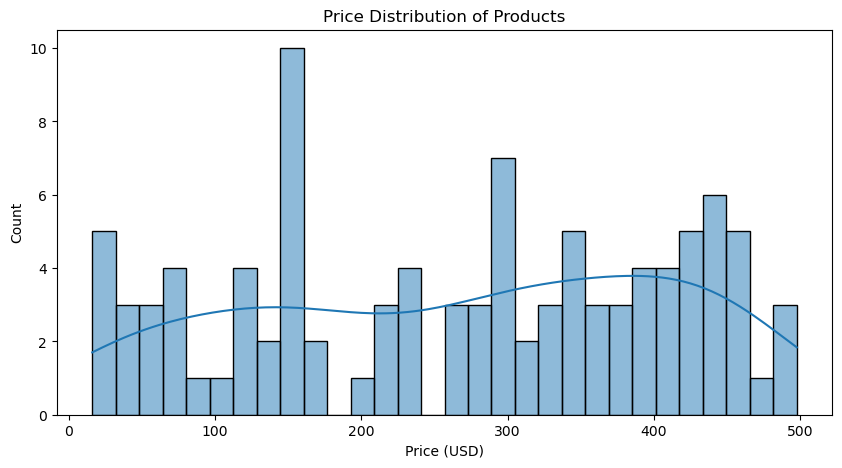

In [18]:
# Price distribution of products
plt.figure(figsize=(10, 5))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.show()

## **3. Transaction Analysis**

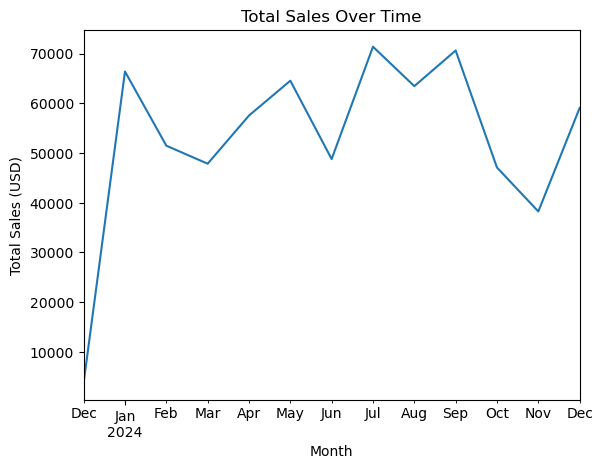

In [19]:
# Total sales over time
sales_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trends.plot(kind='line', title='Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

C:\Users\Sanjay Kinage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


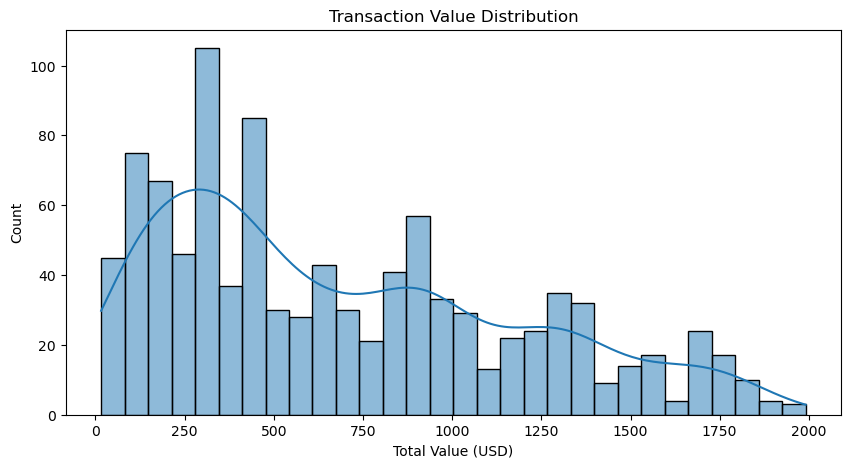

In [20]:
# Transaction value distribution
plt.figure(figsize=(10, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value (USD)')
plt.show()